
# Box office data analysis for Microsoft recommendations
 ### Author: George Opondi
---

## Overview
This project aims at conducting data analysis on box office trends to provide strategic recommendations to Microsoft which would like to get in on the movie business. The ultimate objective is to translate these research findings into practical recommendations for the new movie studio, aiding them in making informed choices about the types of films to produce. This strategic approach ensures that Microsoft's entry into the world of filmmaking aligns with current market demands and maximizes the potential for success in the highly competitive entertainment industry

---


## Business problem
Microsoft recognizes the trend among major corporations venturing into original video content production and is eager to join the industry. To seize this opportunity, the company has made the strategic decision to establish its own movie studio. However, given their lack of expertise in the filmmaking domain, the role of this project is to investigate the current landscape of successful films at the box office and analyzing the types of films that are currently performing exceptionally well in terms of box office revenue and ratings. 

The goal of this project therefore is to provide actionable insights that can guide the decision-making process for the head of Microsoft's new movie studio. By understanding the preferences and trends in the market, the project aims to assist Microsoft in identifying the most promising genres, themes, and styles that resonate with audiences.



---








## Data Understanding
The datasets are from  popular platforms and databases related to the film industry, each serving different purposes. Here's a brief overview of each:
1. **Box Office Mojo:**

**Purpose:** Box Office Mojo is a website that focuses on providing box office revenue information for films.

**Features:** It includes details such as box office gross, release dates, production budgets, and more. It's a valuable resource for understanding the financial performance of movies.

2. **IMDB (Internet Movie Database):**

**Purpose:** IMDB is a comprehensive database of films, television shows, and industry professionals.

**Features:** It includes information on cast and crew, production details, user ratings, reviews, and trivia. IMDB is widely used for its extensive coverage of the entertainment industry.

3. **Rotten Tomatoes:**

**Purpose:** Rotten Tomatoes is a review-aggregation website that provides information on film and television reviews.

**Features:** It aggregates reviews from critics and audiences, providing a "Tomatometer" score that reflects the overall critical reception. It's commonly used to gauge the general consensus on a movie's quality.

4. **TheMovieDB (TMDb):**

**Purpose:** TheMovieDB is an online database that focuses on providing metadata for movies and TV shows.

**Features:** It includes information on cast, crew, plot summaries, posters, and fan-contributed content. Developers often use TMDb for building applications related to movies and TV shows.

5. **The Numbers:**

**Purpose:** The Numbers is a website that focuses on providing detailed financial information for movies.

**Features:** It offers box office data, home video sales, and other financial metrics. It's particularly useful for understanding the financial aspects of the film industry. 

These platforms collectively offer a wealth of information for industry professionals, movie enthusiasts, and those involved in decision-making related to film production, distribution, and consumption. Filmmakers, studios, and investors often use data from these sources to make informed decisions about their projects.

---

## Importing necessary libraries for the project


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## IMDB Data Analysis

In [2]:
# Opening up a connection to the IMDB database
conn = sqlite3.connect('im.db')

# Displaying the table names
table_name_query = """ 
SELECT name AS table_names
FROM sqlite_master
WHERE type = 'table';
"""
pd.read_sql(table_name_query, conn)

,table_names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


### Viewing the movie_basics table as a pandas data frame

In [3]:
query = """ 
SELECT *
FROM movie_basics;
"""
pd.read_sql(query, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


### Viewing the movie_ratings table as a pandas data frame

In [4]:
query = """ 
SELECT *
FROM movie_ratings;
"""
pd.read_sql(query, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


### Analyzing the movie_ratings table

In [5]:
query = """ 
SELECT *
FROM movie_ratings
ORDER BY averagerating DESC;
"""
pd.read_sql(query, conn)

,movie_id,averagerating,numvotes
0,tt5390098,10.0,5
1,tt6295832,10.0,5
2,tt1770682,10.0,5
3,tt2632430,10.0,5
4,tt8730716,10.0,5
...,...,...,...
73851,tt7926296,1.0,17
73852,tt3235258,1.0,510
73853,tt7831076,1.0,96
73854,tt3262718,1.0,223


When the data is ordered by average rating, we can see top rated films but this does not give a clear picture of the success of the films since the number of votes are fewer. A better analysis would be to filter the data with an average rating above 7 and order it by the number of votes the film got.

### Ordering the data by number of votes

In [6]:
query = """ 
SELECT *
FROM movie_ratings
ORDER BY numvotes DESC;
"""
pd.read_sql(query, conn)

,movie_id,averagerating,numvotes
0,tt1375666,8.8,1841066
1,tt1345836,8.4,1387769
2,tt0816692,8.6,1299334
3,tt1853728,8.4,1211405
4,tt0848228,8.1,1183655
...,...,...,...
73851,tt8420530,6.8,5
73852,tt8747790,4.6,5
73853,tt9367004,8.2,5
73854,tt9647642,2.0,5


## Joining the two tables

In [7]:
# Joining the movie_basics and movie_ratings tables to display films with an average rating above 7 and ordered by the numvotes
query = """ 
 SELECT movie_basics.genres, movie_basics.original_title, movie_basics.start_year, movie_ratings.averagerating, movie_ratings.numvotes
FROM movie_basics
JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
WHERE movie_ratings.averagerating >= 7
ORDER BY movie_ratings.numvotes DESC, movie_ratings.averagerating
LIMIT 10;
"""
df = pd.read_sql(query, conn)
df

,genres,original_title,start_year,averagerating,numvotes
0,"Action,Adventure,Sci-Fi",Inception,2010,8.8,1841066
1,"Action,Thriller",The Dark Knight Rises,2012,8.4,1387769
2,"Adventure,Drama,Sci-Fi",Interstellar,2014,8.6,1299334
3,"Drama,Western",Django Unchained,2012,8.4,1211405
4,"Action,Adventure,Sci-Fi",The Avengers,2012,8.1,1183655
5,"Biography,Crime,Drama",The Wolf of Wall Street,2013,8.2,1035358
6,"Mystery,Thriller",Shutter Island,2010,8.1,1005960
7,"Action,Adventure,Comedy",Guardians of the Galaxy,2014,8.1,948394
8,"Action,Adventure,Comedy",Deadpool,2016,8.0,820847
9,"Action,Adventure,Sci-Fi",The Hunger Games,2012,7.2,795227


Here we can now see the top rated films ordered by the number of votes. This now gives a clear understanding of the top rated films. Now to visualize the findings.

## Visualizing IMDB analysis

### Top performing Genres by Number of votes

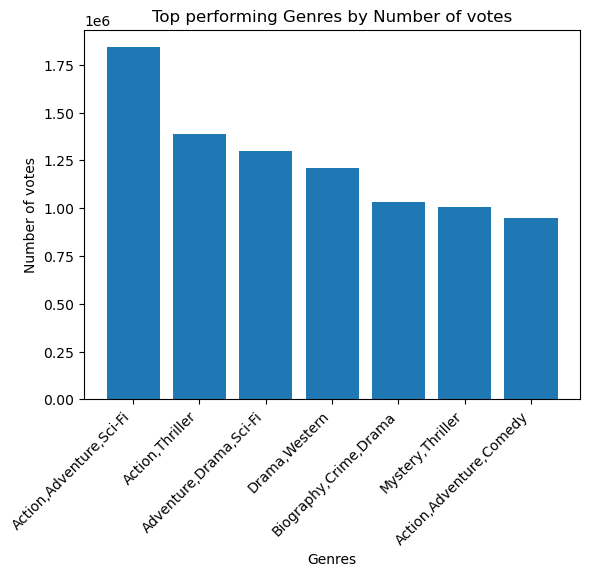

In [8]:
# Plotting a bar graph
plt.bar(df['genres'], df['numvotes'])

# Adding labels and title
plt.xlabel('Genres')
plt.ylabel('Number of votes')
plt.title('Top performing Genres by Number of votes')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()

From the analysis we can deduce that the Action,Adventure,Sci-Fi genre attracts large audiences due to its high number of votes. Microsoft would most likely therefore attract large audiences if they produced films in this genre category followed closely by Action,Thriller and Adventure,Drama,Sci-Fi genres.

### Top performing Genres by Average rating

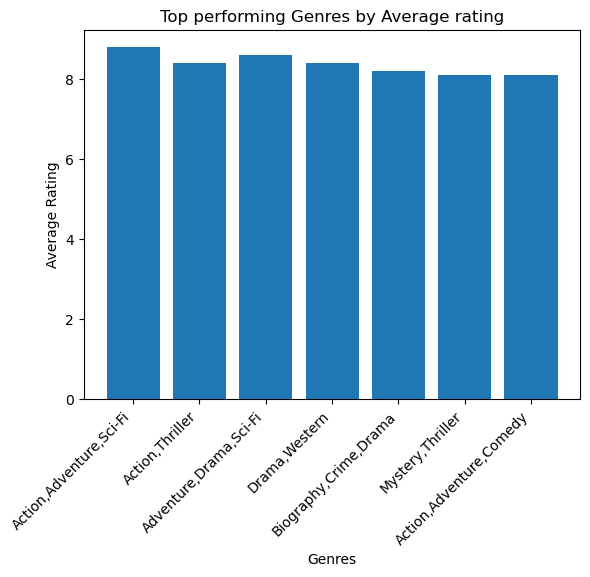

In [9]:
# Plotting a bar graph
plt.bar(df['genres'], df['averagerating'])

# Adding labels and title
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Top performing Genres by Average rating')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()

From the average rating of the films, the Action,Adventure,Sci-Fi genre is still the top performing genre. This genre resonates with audiences and therefore Microsoft would benefit by producing films in this genre category. 

### Top performing Films by Average rating

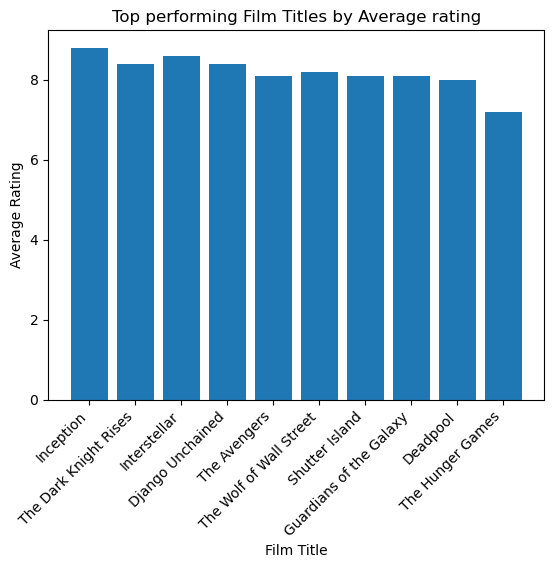

In [10]:
# Plotting a bar graph
plt.bar(df['original_title'], df['averagerating'])

# Adding labels and title
plt.xlabel('Film Title')
plt.ylabel('Average Rating')
plt.title('Top performing Film Titles by Average rating')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()

Examples of the top rated films are films such as Inception and The Dark Knight Rises.  Comprising of the Action,Adventure,Sci-Fi and the Action, Thriller Genres.

### Average Rating and Number of votes by Film Genre

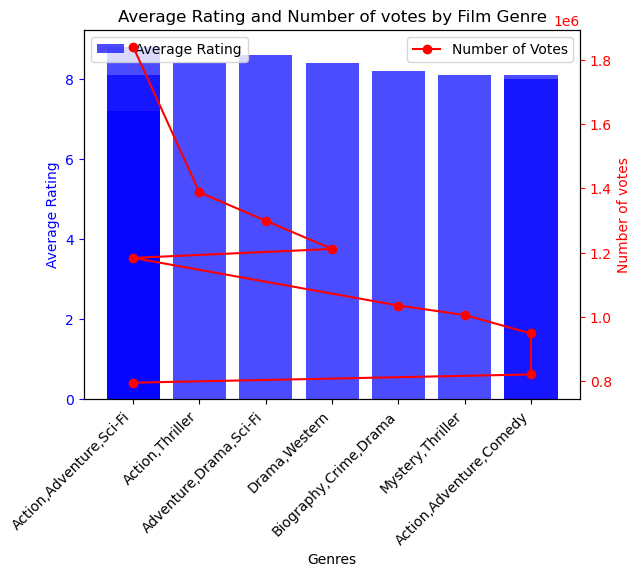

In [11]:
# Creating a figure and primary y-axis for bar graph
fig, ax1 = plt.subplots()

# Bar graph on primary y-axis
ax1.bar(df['genres'], df['averagerating'], color='b', alpha=0.7, label='Average Rating')
ax1.set_xlabel('Genres')
ax1.set_ylabel('Average Rating', color='b')
ax1.tick_params('y', colors='b')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Creating a secondary y-axis for the line graph
ax2 = ax1.twinx()
ax2.plot(df['genres'], df['numvotes'], color='r', marker='o', label='Number of Votes')
ax2.set_ylabel('Number of votes', color='r')
ax2.tick_params('y', colors='r')

# Adding legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')



# Adding title
plt.title('Average Rating and Number of votes by Film Genre')

# Show the plot
plt.show()

This visualization shows both the Average Rating and Number of votes by Film Genre and we can clearly see that the Action,Adventure,Sci-Fi is the best performing genre both by number of votes and average rating.

### Number of votes and Average rating by Film Genre

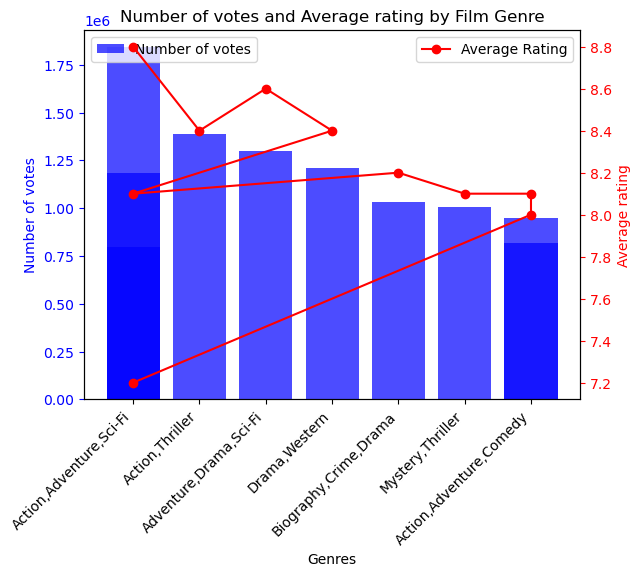

In [12]:
# Creating a figure and primary y-axis for bar graph
fig, ax1 = plt.subplots()

# Bar graph on primary y-axis
ax1.bar(df['genres'], df['numvotes'], color='b', alpha=0.7, label='Number of votes')
ax1.set_xlabel('Genres')
ax1.set_ylabel('Number of votes', color='b')
ax1.tick_params('y', colors='b')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Creating a secondary y-axis for the line graph
ax2 = ax1.twinx()
ax2.plot(df['genres'], df['averagerating'], color='r', marker='o', label='Average Rating')
ax2.set_ylabel('Average rating', color='r')
ax2.tick_params('y', colors='r')

# Adding legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')



# Adding title
plt.title('Number of votes and Average rating by Film Genre')

# Show the plot
plt.show()

This visualization shows both the Number of votes and Average Rating by Film Genre and we can clearly see that the Action,Adventure,Sci-Fi is the best performing genre both by number of votes and average rating.

### Closing connection to the IMDB DataBase

In [13]:
conn.close()

## Box Office Mojo Data Analysis

In [14]:
#Reading te csv file
df = pd.read_csv('bom.movie_gross.csv')

### Understanding the data

In [15]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [16]:
df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
domestic_gross,3359.0,2.874585e+07,6.698250e+07,100.0,120000.0,1400000.0,27900000.0,936700000.0
year,3387.0,2.013958e+03,2.478141e+00,2010.0,2012.0,2014.0,2016.0,2018.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [19]:
df.shape

(3387, 5)

In [20]:
df.value_counts()

title                           studio    domestic_gross  foreign_gross  year
'71                             RAtt.     1300000.0       355000         2015    1
Solo: A Star Wars Story         BV        213800000.0     179200000      2018    1
Sparkle (2012)                  TriS      24400000.0      240000         2012    1
Space Dogs 3D                   EpicPics  14400.0         8300000        2012    1
Southside with You              RAtt.     6300000.0       208000         2016    1
                                                                                ..
Hubble 3D                       WB        52400000.0      21500000       2010    1
Howl                            Osci.     617000.0        566000         2010    1
How to be a Latin Lover         PNT       32100000.0      29700000       2017    1
How to Train Your Dragon 2      Fox       177000000.0     444500000      2014    1
xXx: The Return of Xander Cage  Par.      44900000.0      301200000      2017    1
Name: cou

In [21]:
# checking null values
df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [22]:
df.isnull().any()

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

The data set includes details such as box office gross and release dates. It's a valuable resource for understanding the financial performance of movies.
The dataset has 5 columns and 3387 columns. Certain columns have missing values so that should be taken into consideration during the analysis.

### Data Pre-processing

In [23]:
#dropping missing values from the dataset
df.dropna(inplace=True)

In [24]:
# checking null values
df.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [25]:
df.isnull().any()

title             False
studio            False
domestic_gross    False
foreign_gross     False
year              False
dtype: bool

In [26]:
df.shape

(2007, 5)

In [27]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


The foreign_gross column has to be converted into a numeric datatytpe to be able to perform arithmetic operations

In [29]:
#convert the foreign_gross column to numeric
df['foreign_gross'] = df['foreign_gross'].str.replace(',','').astype(float)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


## Analyzing and visualizing Box Office Mojo Data

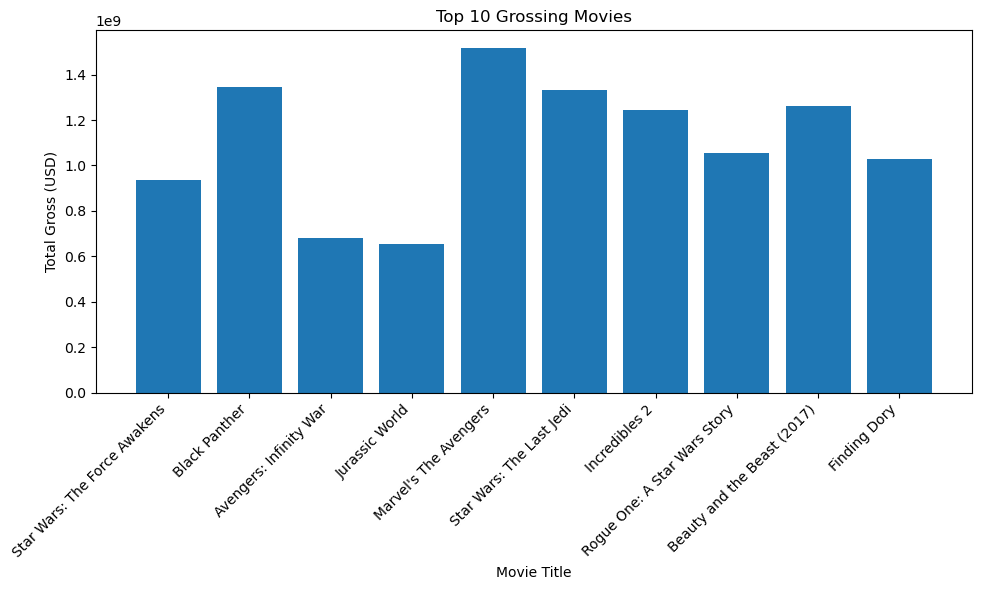

In [31]:
# Sorting the dataframe by total gross
df_sorted = df.sort_values(by=['domestic_gross', 'foreign_gross'], ascending=False)

# Getting the top 10 movies
top_10_movies = df_sorted.head(10)

# Extracting the movie titles and total gross
movie_titles = top_10_movies['title'].to_numpy()
total_gross = top_10_movies['domestic_gross'] + top_10_movies['foreign_gross']

# Creating a bar chart of the movie titles and total gross
plt.figure(figsize=(10, 6))
plt.bar(movie_titles, total_gross)
plt.xlabel("Movie Title")
plt.ylabel("Total Gross (USD)")
plt.title("Top 10 Grossing Movies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

The graph shows the total gross(domestic + foreign) of the top ten highest grossing films. From the graph we can see films such as Marvel's The Avengers and Black panther being two of the highest grossing films. 



## The Numbers Data Analysis

In [32]:
#Reading the csv file
df2 = pd.read_csv('tn.movie_budgets.csv')


### Understanding the data

In [33]:
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [34]:
df2.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [35]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5782.0,50.372363,28.821076,1.0,25.0,50.0,75.0,100.0


In [36]:
df2.shape

(5782, 6)

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


It is worth noting that production_budget, domestic_gross and worldwide_gross columns are filled in as objects. In order to perform arithmetic operations on the columns, we will have to convert them into numerical columns

### Data Pre-processing

In [38]:
#Converting the object columns into numeric columns
# Remove commas and dollar signs, then convert to numeric
df2['production_budget'] = pd.to_numeric(df2['production_budget'].replace('[\$,]', '', regex=True))
df2['domestic_gross'] = pd.to_numeric(df2['domestic_gross'].replace('[\$,]', '', regex=True))
df2['worldwide_gross'] = pd.to_numeric(df2['worldwide_gross'].replace('[\$,]', '', regex=True))

In [39]:
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [40]:
# checking null values
df2.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

The dataset does not contain any null values

## Analyzing and visualizing The Numbers Data

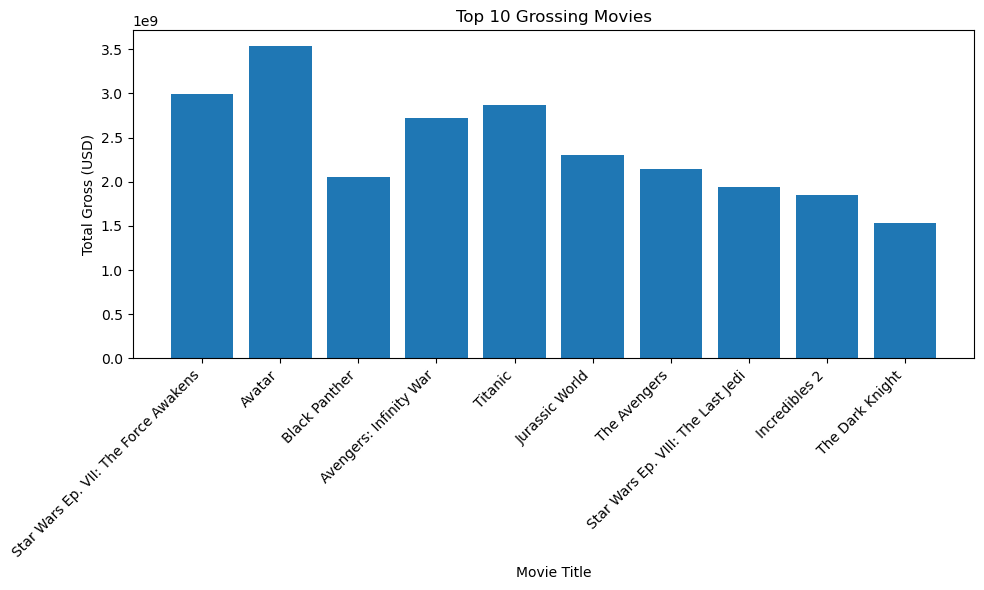

In [41]:
# Sorting the dataframe by total gross
df_sorted2 = df2.sort_values(by=['domestic_gross', 'worldwide_gross'], ascending=False)

# Getting the top 10 movies
top_10_films = df_sorted2.head(10)

# Extracting the movie titles and total gross
titles = top_10_films['movie'].to_numpy()
sum_gross = top_10_films['domestic_gross'] + top_10_films['worldwide_gross']

# Creating a bar chart of the movie titles and total gross
plt.figure(figsize=(10, 6))
plt.bar(titles, sum_gross)
plt.xlabel("Movie Title")
plt.ylabel("Total Gross (USD)")
plt.title("Top 10 Grossing Movies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

According to this graph with information from The Numbers csv file, Avatar was the highest grossing film followed closely by Star Ep. VII: The Force Awakens.

### Analyzing the production budget compared to the total gross

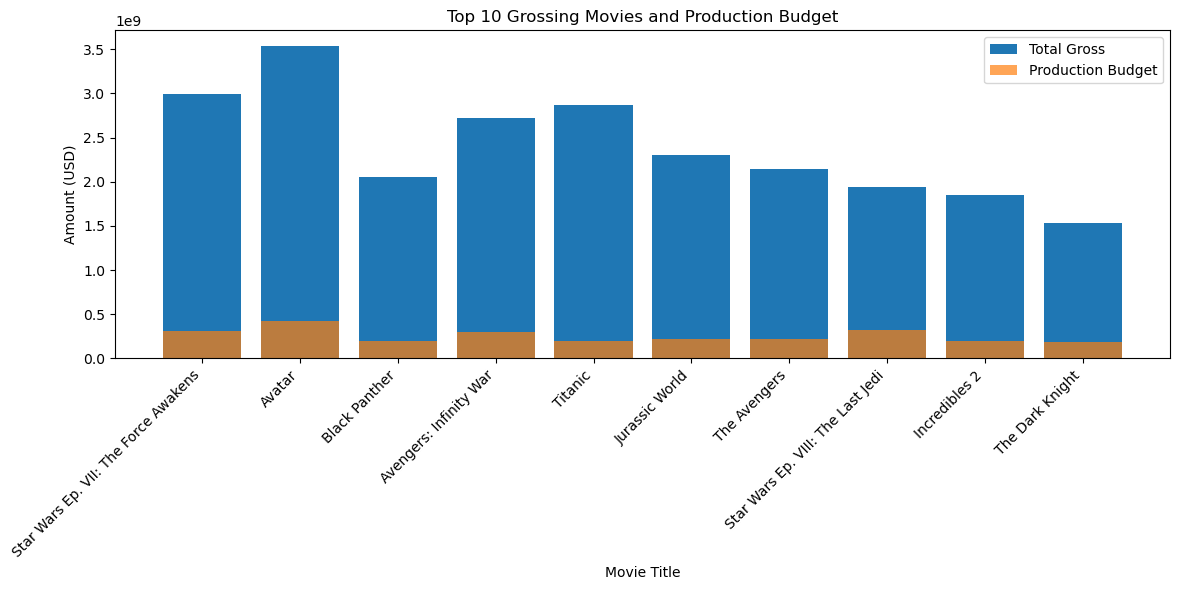

In [42]:
# Sorting the dataframe by total gross
df_sorted2 = df2.sort_values(by=['domestic_gross', 'worldwide_gross'], ascending=False)

# Getting the top 10 movies
top_10_films = df_sorted2.head(10)

# Extracting the movie titles, total gross, and production budget
titles = top_10_films['movie'].to_numpy()
sum_gross = top_10_films['domestic_gross'] + top_10_films['worldwide_gross']
production_budget = top_10_films['production_budget']
# Creating figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Creating bar chart for total gross
ax.bar(titles, sum_gross, label='Total Gross')

# Creating bar chart for production budget
ax.bar(titles, production_budget, label='Production Budget', alpha=0.7)

# Adding labels and title
ax.set_xlabel("Movie Title")
ax.set_ylabel("Amount (USD)")
ax.set_title("Top 10 Grossing Movies and Production Budget")
ax.legend()
ax.set_xticks(titles)
ax.set_xticklabels(titles, rotation=45, ha="right")
plt.tight_layout()
plt.show()

Graph showing the comparison between production budgets and total gross of the top ten highest grossing films